importing packages and creating dataframe

In [38]:
import csv
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from statistics import mean
#https://www.geeksforgeeks.org/find-average-list-python/

In [39]:
standard_df=pd.read_csv("./Assignment data original.csv")
standard_df.info()
#create dataframe


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8660 entries, 0 to 8659
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     8660 non-null   int64 
 1   House Number                   8660 non-null   int64 
 2   Street                         8660 non-null   object
 3   First Name                     8660 non-null   object
 4   Surname                        8660 non-null   object
 5   Age                            8660 non-null   object
 6   Relationship to Head of House  8660 non-null   object
 7   Marital Status                 6780 non-null   object
 8   Gender                         8660 non-null   object
 9   Occupation                     8660 non-null   object
 10  Infirmity                      8660 non-null   object
 11  Religion                       6720 non-null   object
dtypes: int64(2), object(10)
memory usage: 812.0+ KB


Initial exploration and cleaning 

In [40]:
#from pandas_profiling import ProfileReport

In [41]:
#standard_df.profile_report()

In [42]:
print(standard_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8660 entries, 0 to 8659
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Unnamed: 0                     8660 non-null   int64 
 1   House Number                   8660 non-null   int64 
 2   Street                         8660 non-null   object
 3   First Name                     8660 non-null   object
 4   Surname                        8660 non-null   object
 5   Age                            8660 non-null   object
 6   Relationship to Head of House  8660 non-null   object
 7   Marital Status                 6780 non-null   object
 8   Gender                         8660 non-null   object
 9   Occupation                     8660 non-null   object
 10  Infirmity                      8660 non-null   object
 11  Religion                       6720 non-null   object
dtypes: int64(2), object(10)
memory usage: 812.0+ KB
None


In [43]:
print(standard_df.isnull().sum())

#locating null values 

Unnamed: 0                          0
House Number                        0
Street                              0
First Name                          0
Surname                             0
Age                                 0
Relationship to Head of House       0
Marital Status                   1880
Gender                              0
Occupation                          0
Infirmity                           0
Religion                         1940
dtype: int64


Age

In [44]:
error_rows = []
for i in range(len(standard_df['Age'])):
    try:
        standard_df['Age'][i]= int(float(standard_df['Age'][i]))
    except:
        error_rows.append(i)
        

print(error_rows)
# converting all values to floats and printing 
#the locations of any problematic rows 

C:\Users\Matty\AppData\Local\Temp\ipykernel_20732\601210022.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  standard_df['Age'][i]= int(float(standard_df['Age'][i]))


[4800]


In [45]:
print (standard_df['Age'][error_rows])
standard_df['Age'] = standard_df['Age'].replace('three', 3)
print (standard_df['Age'][error_rows])
#correcting erronious rows

4800    three
Name: Age, dtype: object
4800    3
Name: Age, dtype: int64


In [46]:
x=0
for i in range(len(standard_df['Age'])):
    
    if standard_df['Age'][i] > 122:# oldest person ever
        standard_df['Age'][i] = int((standard_df['Age'].mean()))
        x=x+1
        print(f'line {i} changed')

print(f'{x} line(s) changed')

print(standard_df['Age'][3220])
#finding, fixing and reporting values for age older than the oldest person

line 3220 changed
1 line(s) changed
37


C:\Users\Matty\AppData\Local\Temp\ipykernel_20732\261906380.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  standard_df['Age'][i] = int((standard_df['Age'].mean()))


In [47]:
print(max(standard_df['Age']))

print(min(standard_df['Age']))

print(standard_df['Age'].mean())
#confirming ages are reasonable

119
0
37.547806004618934


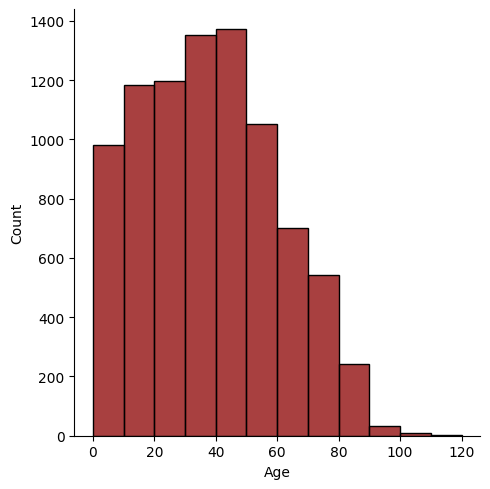

In [48]:
age_hist = sns.displot(standard_df['Age'], binwidth= 10, color = 'darkred')
plt.show()
age_hist.figure.savefig('./age_hist.png')
#plotting age on a histogram to check for suspicous distrobutions

Gender

In [49]:
print(standard_df['Gender'].unique())
#3 people have no gender
standard_df['Gender'] = standard_df['Gender'].replace([' ','m', 'male', 'M', 'f','female', 'F'],['No Response','Male', 'Male', 'Male', 'Female', 'Female', 'Female'])
#standardising gender
print(standard_df['Gender'].unique())

['Male' 'Female' 'female' 'f' 'male' 'M' 'F' ' ' 'm']
['Male' 'Female' 'No Response']


In [50]:
print(standard_df['Gender'].value_counts())
#checking for reasonable distrobution in gender

Female         4545
Male           4112
No Response       3
Name: Gender, dtype: int64


In [51]:
print(standard_df['Marital Status'].value_counts())
#checking for errors in responses
standard_df['Marital Status'] = standard_df['Marital Status'].replace([' ','S','D','W','M'], ['Single','Single', 'Divorced','Widowed','Married'])
#standardising responses
print(standard_df['Marital Status'].value_counts())
#validating responses are stndardised
print(standard_df['Marital Status'].isnull().sum())
#checking for null values

Single      3067
Married     2349
Divorced     872
Widowed      471
D              8
S              7
W              4
               1
M              1
Name: Marital Status, dtype: int64
Single      3075
Married     2350
Divorced     880
Widowed      475
Name: Marital Status, dtype: int64
1880


In [52]:
for i in range(len(standard_df['Age'])):
    if standard_df['Age'][i] <18:
        standard_df['Marital Status'][i] = 'Child'
#telegraphing children as such
print(standard_df['Marital Status'].value_counts())
#checking children have been added
print(standard_df['Marital Status'].isnull().sum())
#checking all null values were removed with the reclassification of children

C:\Users\Matty\AppData\Local\Temp\ipykernel_20732\3483230816.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  standard_df['Marital Status'][i] = 'Child'


Single      3074
Married     2348
Child       1883
Divorced     880
Widowed      475
Name: Marital Status, dtype: int64
0


In [53]:
print(standard_df['Age'].mean())
print(standard_df['Age'].median())
print(np.std(standard_df['Age']))
#descriptive statistics for age

37.547806004618934
37.0
21.987302677229476


Employment status

In [54]:
standard_df['Employment_Status']  = standard_df['Occupation']
for i in range(len(standard_df['Occupation'])):
    if standard_df['Age'][i] < 18:
        standard_df['Employment_Status'][i] = 'Child'
    elif standard_df['Occupation'][i].split(' ')[0]=='Retired':
        standard_df['Employment_Status'][i] = 'Retired'
    elif standard_df['Occupation'][i] == 'Unemployed':
        standard_df['Employment_Status'][i] = 'Unemployed'
    elif standard_df['Occupation'][i] == 'University Student':
        standard_df['Employment_Status'][i] = 'Student'
    else:
        standard_df['Employment_Status'][i] = 'Employed'
#creating values for employment status based on occupation
print(standard_df['Employment_Status'].value_counts())
#printing values

C:\Users\Matty\AppData\Local\Temp\ipykernel_20732\3328442495.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  standard_df['Employment_Status'][i] = 'Employed'
C:\Users\Matty\AppData\Local\Temp\ipykernel_20732\3328442495.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  standard_df['Employment_Status'][i] = 'Unemployed'
C:\Users\Matty\AppData\Local\Temp\ipykernel_20732\3328442495.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

Employed      4741
Child         1883
Retired        915
Unemployed     596
Student        525
Name: Employment_Status, dtype: int64


In [55]:
print(standard_df['Employment_Status'].value_counts(normalize = True)*100)
#employment rate includeing children

Employed      54.745958
Child         21.743649
Retired       10.565820
Unemployed     6.882217
Student        6.062356
Name: Employment_Status, dtype: float64


In [56]:
print(standard_df[standard_df.Age >=18]['Employment_Status'].value_counts(normalize = True)*100)
#employment rate not including children

Employed      69.957208
Retired       13.501549
Unemployed     8.794452
Student        7.746791
Name: Employment_Status, dtype: float64


In [57]:
print(standard_df[standard_df.Gender == 'Male'][standard_df.Age >= 18]['Employment_Status'].value_counts(normalize = True)*100)
#male employment rate not including children

Employed      72.438947
Retired       13.859816
Student        7.675230
Unemployed     6.026007
Name: Employment_Status, dtype: float64


C:\Users\Matty\AppData\Local\Temp\ipykernel_20732\24951718.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(standard_df[standard_df.Gender == 'Male'][standard_df.Age >= 18]['Employment_Status'].value_counts(normalize = True)*100)


In [58]:
print(standard_df[standard_df.Gender == 'Female'][standard_df.Age >= 18]['Employment_Status'].value_counts(normalize = True)*100)
#female employment rate not including children

Employed      67.826567
Retired       13.173157
Unemployed    11.212372
Student        7.787904
Name: Employment_Status, dtype: float64


C:\Users\Matty\AppData\Local\Temp\ipykernel_20732\3825826300.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(standard_df[standard_df.Gender == 'Female'][standard_df.Age >= 18]['Employment_Status'].value_counts(normalize = True)*100)


In [59]:
print('mean age of retired people')
standard_df['Age'][standard_df.Employment_Status == 'Retired'].mean()
#mean age of retired people

mean age of retired people


76.54863387978142

Addresses

In [60]:
standard_df['Full Address'] = standard_df['House Number'].astype(str) + ' ' + standard_df['Street']
#combining house number and street 
print(standard_df['Full Address'].nunique())
#reference: https://www.w3schools.com/python/pandas/ref_df_nunique.asp#:~:text=The%20nunique()%20method%20returns,unique%20values%20for%20each%20row.
#3417 individual households
print(8659/3417)
#working out occupants per household


3417
2.534094234708809


Occupancy

In [61]:
standard_df['Occupancy'] = standard_df.groupby('Full Address')['Full Address'].transform('count')
#adding occupancy to the df by grouping the same address together
#https://towardsdatascience.com/count-occurrences-of-a-value-pandas-e5dad02303e9
display(standard_df)
standard_df['Occupancy'].sum()
#confirming occupancy is correct and checking number of houses

,Unnamed: 0,House Number,Street,First Name,Surname,Age,Relationship to Head of House,Marital Status,Gender,Occupation,Infirmity,Religion,Employment_Status,Full Address,Occupancy
0,0,1,Dixon Drive,Leon,Clark,64,Head,Married,Male,"Engineer, energy",None,Christian,Employed,1 Dixon Drive,2
1,1,1,Dixon Drive,Lauren,Turnbull,63,Wife,Married,Female,Psychiatrist,None,Christian,Employed,1 Dixon Drive,2
2,2,2,Dixon Drive,Katie,Kirby,57,Head,Single,Female,Unemployed,None,Christian,Unemployed,2 Dixon Drive,4
3,3,2,Dixon Drive,Jordan,Kirby,30,Son,Single,Male,"Engineer, biomedical",None,Christian,Employed,2 Dixon Drive,4
4,4,2,Dixon Drive,Gareth,Kirby,28,Son,Single,Male,"Surveyor, building control",None,Christian,Employed,2 Dixon Drive,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8655,8655,1,December Manor,Kevin,Brown,22,None,Single,Male,University Student,None,None,Student,1 December Manor,12
8656,8656,1,December Manor,Ashleigh,Porter,43,None,Single,Female,Barista,None,None,Employed,1 December Manor,12
8657,8657,1,December Manor,Marilyn,Smith,42,None,Single,Female,"Clinical scientist, histocompatibility and imm...",None,Christian,Employed,1 December Manor,12
8658,8658,1,December Manor,Joanna,Steele,46,None,Single,Female,Theme park manager,None,Catholic,Employed,1 December Manor,12


33324

In [62]:
standard_df['Age'][standard_df.Occupancy ==1].max()-standard_df['Age'][standard_df.Occupancy ==1].min()
#finding occupancy range

87

In [63]:
standard_df['Occupancy'].describe() 
#the mean is the mean for individuals not the dataset
#for example each individual lives in a hosue with 8.85 individuals in it
#no each house has 3.85 individuals the mean per house is 2.53

count    8660.000000
mean        3.848037
std         3.021156
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        22.000000
Name: Occupancy, dtype: float64

In [64]:
print('stats for occupancy below 6')
(standard_df['Occupancy'][standard_df.Occupancy <= 6].count()) / (standard_df['Occupancy'].count()) *100
#percentage of poeple living in houses with 6 people or less

stats for occupancy below 6


93.03695150115473

In [65]:
print('mean age of people living alone')
standard_df['Age'][standard_df.Occupancy == 1].describe()
#mean of people living alone

mean age of people living alone


count    1171.000000
mean       55.343296
std        20.687376
min        18.000000
25%        37.000000
50%        58.000000
75%        72.000000
max       105.000000
Name: Age, dtype: float64

Age pyramid

In [66]:
male_age = []
female_age = []

for i in range(len(standard_df['Gender'])):
    if standard_df['Gender'][i] == 'Male':
        male_age.append((standard_df['Age'][i]))
    elif standard_df['Gender'][i] == 'Female':
        female_age.append(standard_df['Age'][i])
#adding males and females into different lists


In [67]:
male = [0,0,0,0,0,0,0,0,0,0,0]
female = [0,0,0,0,0,0,0,0,0,0,0]
for i in range(len(male_age)):
    if male_age[i] >=0 and male_age[i] <=9:
        male[0] = male[0]+1
    elif male_age[i] >=10 and male_age[i] <=19:
        male[1] = male[1]+1
    elif male_age[i] >=20 and male_age[i] <=29:
        male[2] = male[2]+1
    elif male_age[i] >=30 and male_age[i] <=39:
        male[3] = male[3]+1
    elif male_age[i] >=40 and male_age[i] <=49:
        male[4] = male[4]+1
    elif male_age[i] >=50 and male_age[i] <=59:
        male[5] = male[5]+1
    elif male_age[i] >=60 and male_age[i] <=69:
        male[6] = male[6]+1
    elif male_age[i] >=70 and male_age[i] <=79:
        male[7] = male[7]+1
    elif male_age[i] >=80 and male_age[i] <=89:
        male[8] = male[8]+1
    elif male_age[i] >=90 and male_age[i] <=99:
        male[9] = male[9]+1
    elif male_age[i] >=100:
        male[10] = male[10]+1
for i in range(len(male_age)):
    if female_age[i] >=0 and female_age[i] <=9:
        female[0] = female[0]+1
    elif female_age[i] >=10 and female_age[i] <=19:
        female[1] = female[1]+1
    elif female_age[i] >=20 and female_age[i] <=29:
        female[2] = female[2]+1
    elif female_age[i] >=30 and female_age[i] <=39:
        female[3] = female[3]+1
    elif female_age[i] >=40 and female_age[i] <=49:
        female[4] = female[4]+1
    elif female_age[i] >=50 and female_age[i] <=59:
        female[5] = female[5]+1
    elif female_age[i] >=60 and female_age[i] <=69:
        female[6] = female[6]+1
    elif female_age[i] >=70 and female_age[i] <=79:
        female[7] = female[7]+1
    elif female_age[i] >=80 and female_age[i] <=89:
        female[8] = female[8]+1
    elif female_age[i] >=90 and female_age[i] <=99:
        female[9] = female[9]+1
    elif female_age[i] >=100:
        female[10] = female[10]+1
#seperating males and females into bins
for i in range(len(male)):
    male[i] = male[i]*-1
#making all male values negative
print(male)
print(female)
#validating values

[-492, -591, -570, -621, -616, -491, -343, -264, -102, -15, -7]
[455, 537, 571, 666, 679, 495, 327, 240, 123, 15, 4]


In [68]:
age_p = pd.DataFrame({'Age':['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100+'], 
'Male': [i for i in male], 
'Female': [i  for i in female]})
print(age_p)
#creating dataframe to assign male and female values to

      Age  Male  Female
0     0-9  -492     455
1   10-19  -591     537
2   20-29  -570     571
3   30-39  -621     666
4   40-49  -616     679
5   50-59  -491     495
6   60-69  -343     327
7   70-79  -264     240
8   80-89  -102     123
9   90-99   -15      15
10   100+    -7       4


In [69]:
AgeClass = ['100+', '90-99', '80-89', '70-79', '60-69', '50-59', '40-49', '30-39', '20-29', '10-19', '0-9']
#defining age classes

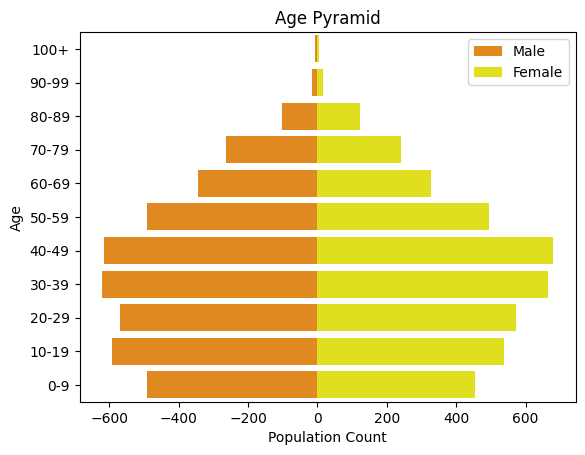

In [70]:
age_pyramid = sns.barplot(x='Male', y='Age', data=age_p, order=AgeClass, 
color=('darkorange'), label='Male'), 
age_pyramid = sns.barplot(x='Female', y='Age', data=age_p, order=AgeClass, 
color=('yellow'), label='Female') 
age_pyramid.legend()
plt.title('Age Pyramid')
plt.xlabel('Population Count')
plt.show()
age_pyramid.figure.savefig('./age_pyramid.png')

#constructing the population pyramid and saving it

In [71]:
print(standard_df['Religion'].value_counts())
standard_df['Religion'] = standard_df['Religion'].fillna(method = 'ffill')
#filling null values for religion
for i in range(len(standard_df['Age'])):
    if standard_df['Age'][i] <18:
        standard_df['Religion'][i] = 'Child'
#identifying children
print(standard_df['Religion'].isnull().sum())
#validating no null values 

None         2937
Christian    1976
Catholic      999
Methodist     580
Muslim        113
Sikh           79
Jewish         27
Private         3
Buddist         2
Orthodoxy       2
Jedi            1
Baptist         1
Name: Religion, dtype: int64


C:\Users\Matty\AppData\Local\Temp\ipykernel_20732\2388350472.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  standard_df['Religion'][i] = 'Child'


0


In [72]:
christian_breakdown_df = standard_df.replace(['Jedi'],['None'])
#removing Jedi as a religion
standard_df['Religion'] = standard_df['Religion'].replace(['Jedi','Catholic', 'Methodist', 'Baptist','Orthodoxy'],['None','Christian', 'Christian', 'Christian', 'Christian'])
#simplifying the dataframe to include christianity as one religion
print(christian_breakdown_df['Religion'].value_counts())
#confirming the above is done 

None         2965
Christian    1990
Child        1883
Catholic     1008
Methodist     584
Muslim        114
Sikh           81
Jewish         27
Private         3
Buddist         2
Orthodoxy       2
Baptist         1
Name: Religion, dtype: int64


In [73]:
print(christian_breakdown_df['Religion'].value_counts())
#inspecting the raw values 
print('')
print(standard_df['Religion'].value_counts())
#inspecting values now christianity is considered one 

None         2965
Christian    1990
Child        1883
Catholic     1008
Methodist     584
Muslim        114
Sikh           81
Jewish         27
Private         3
Buddist         2
Orthodoxy       2
Baptist         1
Name: Religion, dtype: int64

Christian    3585
None         2965
Child        1883
Muslim        114
Sikh           81
Jewish         27
Private         3
Buddist         2
Name: Religion, dtype: int64


In [74]:
print(f" Mean: {christian_breakdown_df.groupby(['Religion'])['Age'].mean()}")
#reference https://datascienceparichay.com/article/pandas-groupby-mean/
print(f" Median: {christian_breakdown_df.groupby(['Religion'])['Age'].median()}")
print(f"Mode: {christian_breakdown_df.groupby(['Religion'])['Age'].agg(lambda x:x.value_counts().index[0])}")
#https://www.statology.org/pandas-groupby-mode/
print(f"Christian breakdown mean: {standard_df.groupby(['Religion'])['Age'].mean()}")
print(f"Christian breakdown median: {standard_df.groupby(['Religion'])['Age'].median()}")
print(f"Christian breakdown mode: {standard_df.groupby(['Religion'])['Age'].agg(lambda x:x.value_counts().index[0])}")
#printing descriptive statistics of the average age of each religion

 Mean: Religion
Baptist      31.000000
Buddist      36.500000
Catholic     43.585317
Child         9.005842
Christian    51.257286
Jewish       44.555556
Methodist    47.178082
Muslim       35.850877
None         42.551096
Orthodoxy    31.000000
Private      63.666667
Sikh         35.888889
Name: Age, dtype: float64
 Median: Religion
Baptist      31.0
Buddist      36.5
Catholic     41.5
Child         9.0
Christian    53.0
Jewish       44.0
Methodist    44.5
Muslim       31.0
None         40.0
Orthodoxy    31.0
Private      80.0
Sikh         31.0
Name: Age, dtype: float64
Mode: Religion
Baptist      31
Buddist      36
Catholic     40
Child        10
Christian    57
Jewish       44
Methodist    49
Muslim       25
None         32
Orthodoxy    33
Private      28
Sikh         22
Name: Age, dtype: int64
Christian breakdown mean: Religion
Buddist      36.500000
Child         9.005842
Christian    48.418689
Jewish       44.555556
Muslim       35.850877
None         42.551096
Private      63.66

In [75]:
print(christian_breakdown_df['Religion'].value_counts(normalize = True)*100)
standard_df['Religion'].value_counts(normalize = True)*100
#printing percentage composition of religion

None         34.237875
Christian    22.979215
Child        21.743649
Catholic     11.639723
Methodist     6.743649
Muslim        1.316397
Sikh          0.935335
Jewish        0.311778
Private       0.034642
Buddist       0.023095
Orthodoxy     0.023095
Baptist       0.011547
Name: Religion, dtype: float64


Christian    41.397229
None         34.237875
Child        21.743649
Muslim        1.316397
Sikh          0.935335
Jewish        0.311778
Private       0.034642
Buddist       0.023095
Name: Religion, dtype: float64

Infirmity

In [76]:
print(standard_df['Infirmity'].value_counts())
#finding the values of infirmity
standard_df['Infirmity'] = standard_df['Infirmity'].replace([' '], ['Unspecified'])
#replacing blanks
print(standard_df['Infirmity'].unique())
#confirming data is correct

None                   8590
Physical Disability      19
Disabled                 14
Blind                    10
                          9
Mental Disability         8
Deaf                      6
Unknown Infection         4
Name: Infirmity, dtype: int64
['None' 'Physical Disability' 'Unspecified' 'Mental Disability' 'Blind'
 'Deaf' 'Disabled' 'Unknown Infection']


Birth and death rate 

In [77]:
age_p_normalised = age_p
age_p_normalised['Male'] = age_p['Male']*-1
age_p_normalised['Total'] = age_p['Male'] + age_p['Female']
print(age_p_normalised)
#taking population pyramid data and adding the total 
#column whilst making the male data positive again

      Age  Male  Female  Total
0     0-9   492     455    947
1   10-19   591     537   1128
2   20-29   570     571   1141
3   30-39   621     666   1287
4   40-49   616     679   1295
5   50-59   491     495    986
6   60-69   343     327    670
7   70-79   264     240    504
8   80-89   102     123    225
9   90-99    15      15     30
10   100+     7       4     11


In [78]:


print('Total Birth Rate Presently')
print((age_p_normalised['Total'][0])/(age_p_normalised['Total'].sum()/1000)/10)
#calculating current birth rate (last 10 years)
print('Total Birth Rate 10 Years Ago')
print((age_p_normalised['Total'][1])/((age_p_normalised['Total'].sum()-age_p_normalised['Total'][0])/1000)/10)
#calculating birth rate from 10 years before
death_rate = []
final_death_rate=[]
print('Death rate')
for i in range(len(age_p_normalised['Age'])):
    if i>=6:
        death_rate.append(age_p_normalised['Total'][i])
#singling out individuals over 60
for i in range(len(death_rate)):
    final_death_rate.append((death_rate[i]/((age_p_normalised['Total'].sum())/1000)/10))
#calculating death rate for those over 60
print(mean(final_death_rate))  

Total Birth Rate Presently
11.515077821011673
Total Birth Rate 10 Years Ago
15.500893225230177
Death rate
3.501945525291829


visualisation

In [79]:
adults_chirst_df = christian_breakdown_df[christian_breakdown_df.Age>=18]
adults = standard_df[standard_df.Age >=18]
#creating dataframes with only adults, one with all religions as reported
#and one with all christians reported together

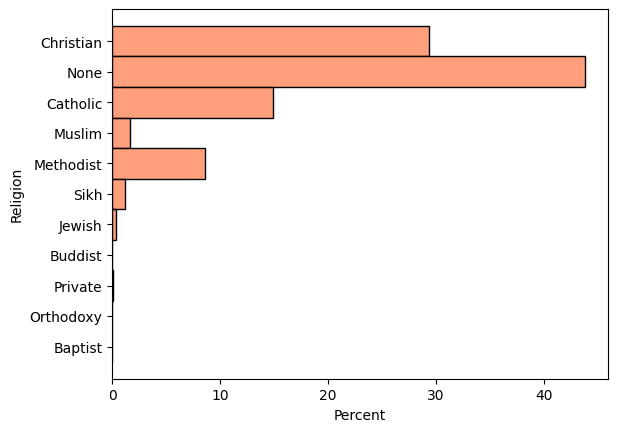

In [80]:
full_religion_hist = sns.histplot(y = adults_chirst_df['Religion'],
                                  data = adults_chirst_df['Religion'],stat = 'percent', 
                                  color = 'coral')
full_religion_hist.figure.savefig('./full_religion_hist.png')

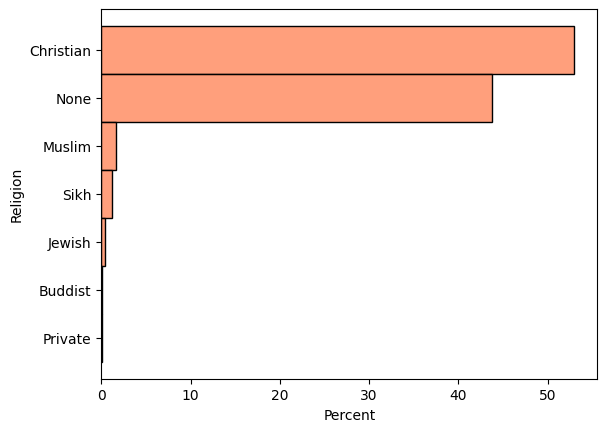

In [81]:
simple_religion_hist = sns.histplot(y = adults['Religion'],data = adults_chirst_df['Religion'],
                                     color = 'coral', stat = 'percent')
simple_religion_hist.figure.savefig('./simple_religion_hist.png')

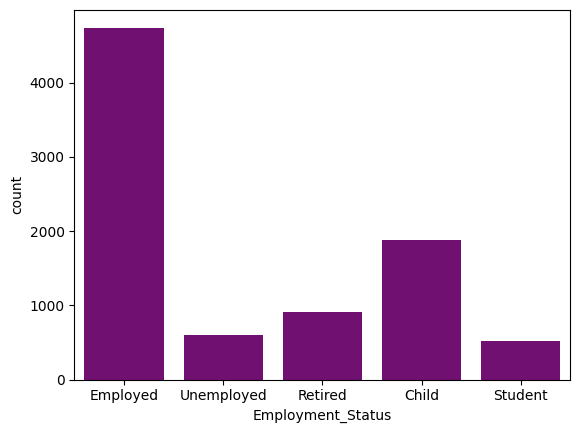

In [82]:
employment_count = sns.countplot(x = standard_df['Employment_Status'], data = standard_df['Employment_Status'], color = 'purple')
employment_count.figure.savefig('./employment_count.png')

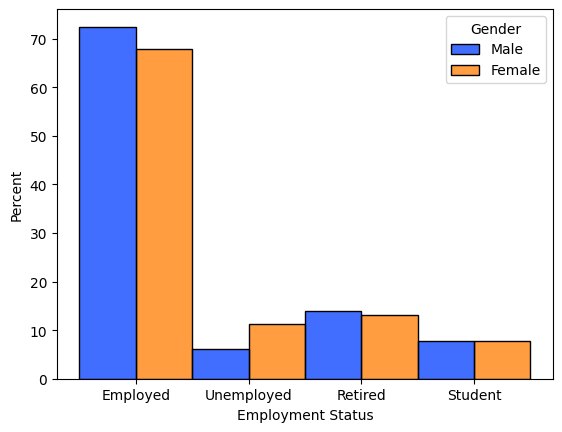

In [83]:
two_gender_df = standard_df[standard_df.Gender != 'No Response']
#creating a df without no response for gender for later analysis
plt.xlabel = ('Employment Status')
employment_hist = sns.histplot( two_gender_df[two_gender_df.Age>=18], 
                                      x= two_gender_df[two_gender_df.Age>=18]['Employment_Status'] ,hue = two_gender_df['Gender'], 
                                      stat="percent",common_norm=False,multiple="dodge", palette = 'bright')
employment_hist.set(xlabel = ('Employment Status'))
#https://www.statology.org/seaborn-axis-labels/
employment_hist.figure.savefig('./employment_hist.png')

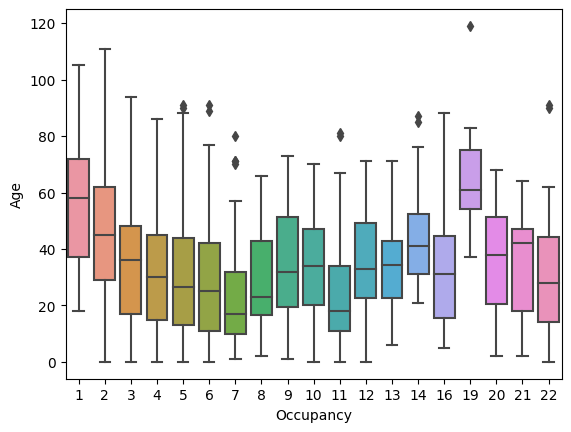

In [84]:
occupancy_boxplot = sns.boxplot(x=standard_df['Occupancy'], y=standard_df['Age'],
            data=standard_df)
occupancy_boxplot.figure.savefig('./occupancy_boxplot.png')

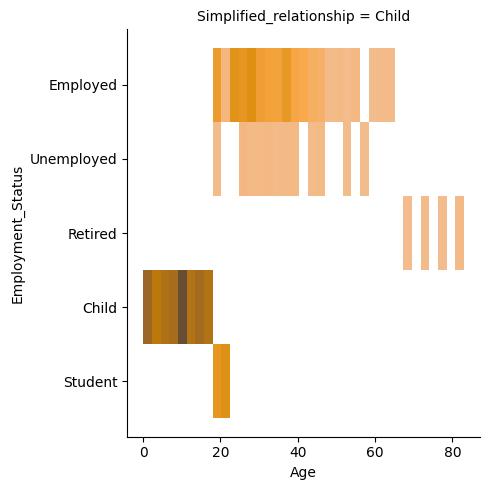

In [85]:
standard_df['Simplified_relationship'] = standard_df['Relationship to Head of House'].replace(['Wife','Husband','Son', 'Daughter', 'Granddaughter', 'Grandson', 'Step-Son', 'Adopted Son', 'Adopted Daughter','Adopted Granddaughter', 'Step-Daughter', 'Adopted Grandson'],['Partner', 'Partner','Child', 'Child', 'Grandchild', 'Grandchild','Child', 'Child', 'Child', 'Grandchild', 'Child', 'Grandchild'])
#creating another attribute which simplifies the relationship 
#to head of houshold catagory, conbining things like adopted children into 
#children
Children_living_with_parents_displot = sns.displot( data = standard_df, x = standard_df['Age'], y = 'Employment_Status',
            col = standard_df[standard_df.Simplified_relationship == 'Child']['Simplified_relationship'] 
            , color = 'Orange')
Children_living_with_parents_displot.figure.savefig('./Children_living_with_parents_displot.png')

C:\Users\Matty\AppData\Local\Temp\ipykernel_20732\3442539469.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Children_living_with_parents_hist = sns.histplot( standard_df, x= standard_df[standard_df.Occupancy<=8][standard_df.Simplified_relationship=='Child'][standard_df.Age>=18]['Occupancy'],


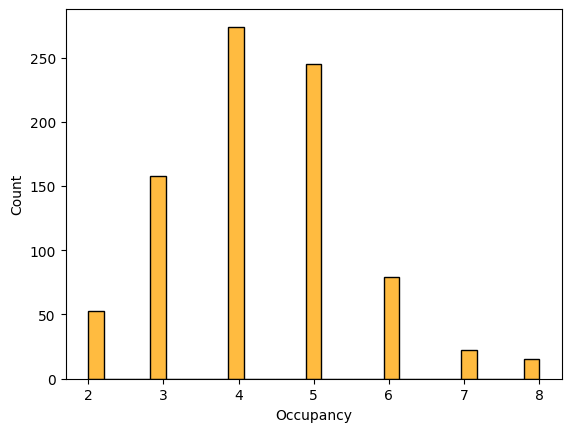

In [86]:
Children_living_with_parents_hist = sns.histplot( standard_df, x= standard_df[standard_df.Occupancy<=8][standard_df.Simplified_relationship=='Child'][standard_df.Age>=18]['Occupancy'],
             color = 'orange')
Children_living_with_parents_hist.figure.savefig('./Children_living_with_parents_hist.png')

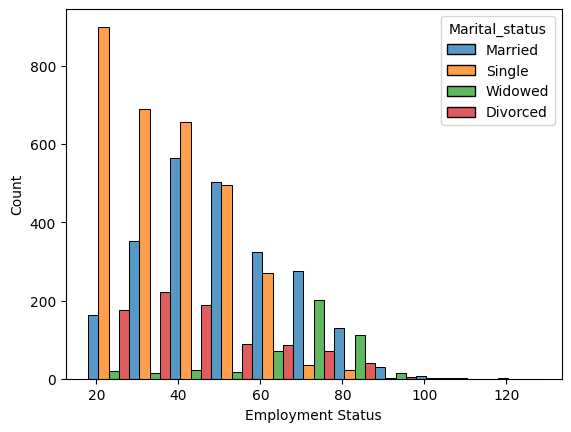

In [87]:
standard_df = standard_df.rename({"Marital Status": "Marital_status"}, axis = 1)

marital_status_hist = sns.histplot( data = standard_df, x= standard_df[standard_df.Age >=18]['Age'],
             stat="count", binwidth = 10, hue = standard_df[standard_df.Marital_status != 'Child']['Marital_status'],
             color = 'Orange', multiple="dodge")
marital_status_hist.set(xlabel = ('Employment Status'))
marital_status_hist .figure.savefig('./marital_status_his.png')

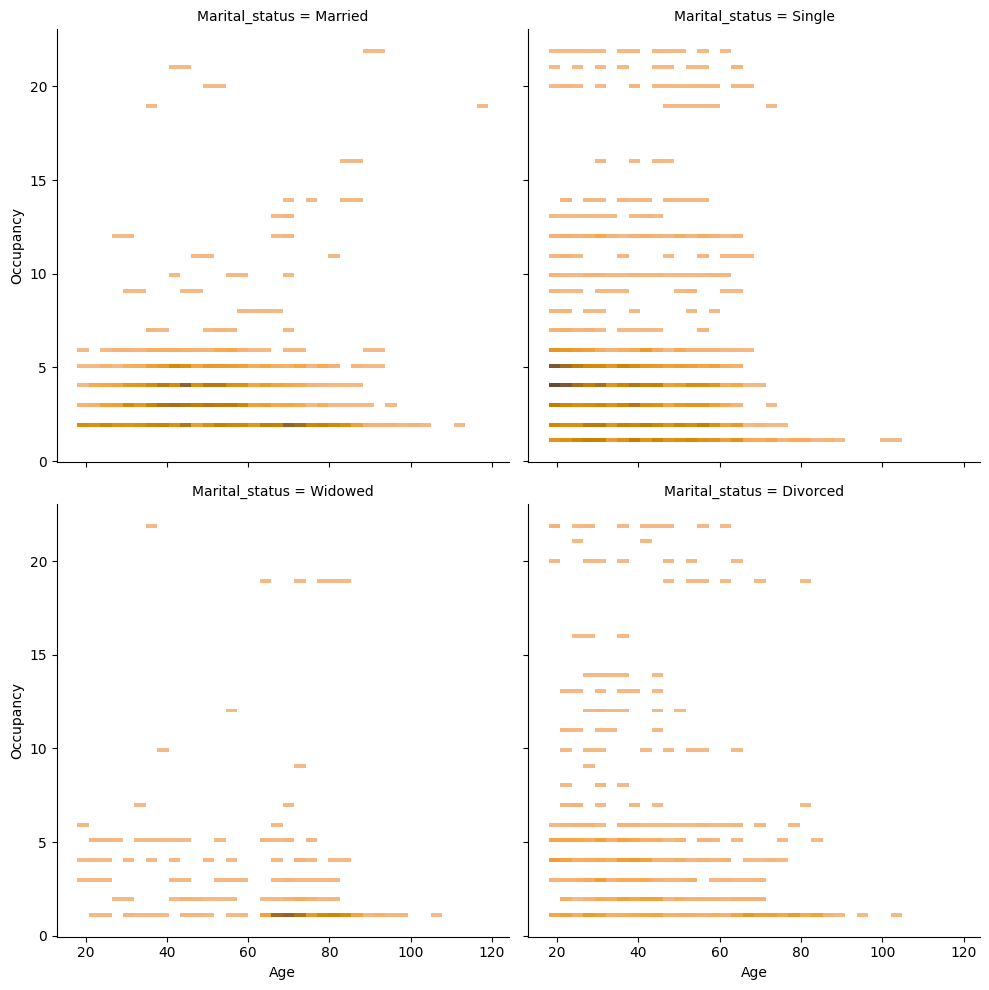

In [88]:
age_occupancy_displot = sns.displot( data = standard_df, x = standard_df['Age'], y = 'Occupancy',
            col = standard_df[standard_df.Marital_status != 'Child']['Marital_status'] 
            , color = 'Orange', col_wrap = 2)
age_occupancy_displot.figure.savefig('./age_occupancy_displot.png')